## NLP Assignment

In [10]:
#Import library required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to C:\Users\Mukesh
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Read data
df_amz=pd.read_excel('Consumer_Reviews_of_Amazon_Products_May19.xlsx')

In [12]:
#display data
df_amz.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [13]:
df_amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews_date         28332 non-null  object 
 13  reviews_dateSeen     28332 non-null  object 
 14  reviews_didPurchase  9 non-null      float64
 15  reviews_doRecommend  16086 non-null 

In [14]:
df_amz.describe()

,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating
count,9.000000,16086.000000,4.100000e+01,16115.000000,28332.000000
mean,0.888889,0.954432,1.840066e+08,0.529321,4.514048
std,0.333333,0.208552,2.337036e+07,9.345017,0.934957
min,0.000000,0.000000,1.116244e+08,0.000000,1.000000
25%,1.000000,1.000000,1.843344e+08,0.000000,4.000000
50%,1.000000,1.000000,1.885078e+08,0.000000,5.000000
75%,1.000000,1.000000,1.988160e+08,0.000000,5.000000
max,1.000000,1.000000,2.085304e+08,621.000000,5.000000


In [15]:
#Q.No-1
df_amz.shape
#Ans-(28332, 24)

(28332, 24)

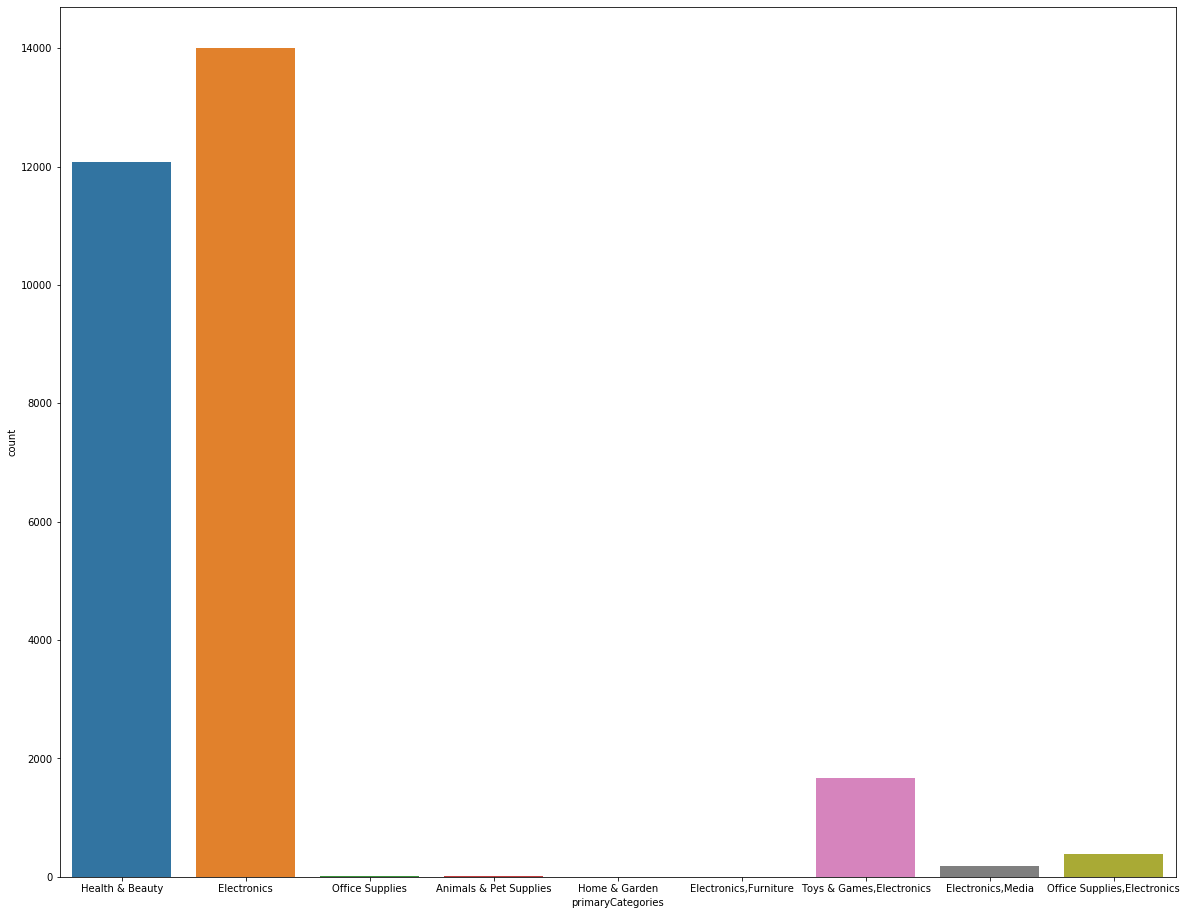

In [19]:
#Q.No-2
plt.figure(figsize=(20,16))
sns.countplot(data=df_amz,x=df_amz.primaryCategories)
#plt.savefig('path')
#Ans-Electronics

In [17]:
#Primary category value count
df_amz.groupby(by='primaryCategories').primaryCategories.count()

<Figure size 432x288 with 0 Axes>

In [20]:
df_amz_1=df_amz.loc[df_amz.reviews_rating==1]

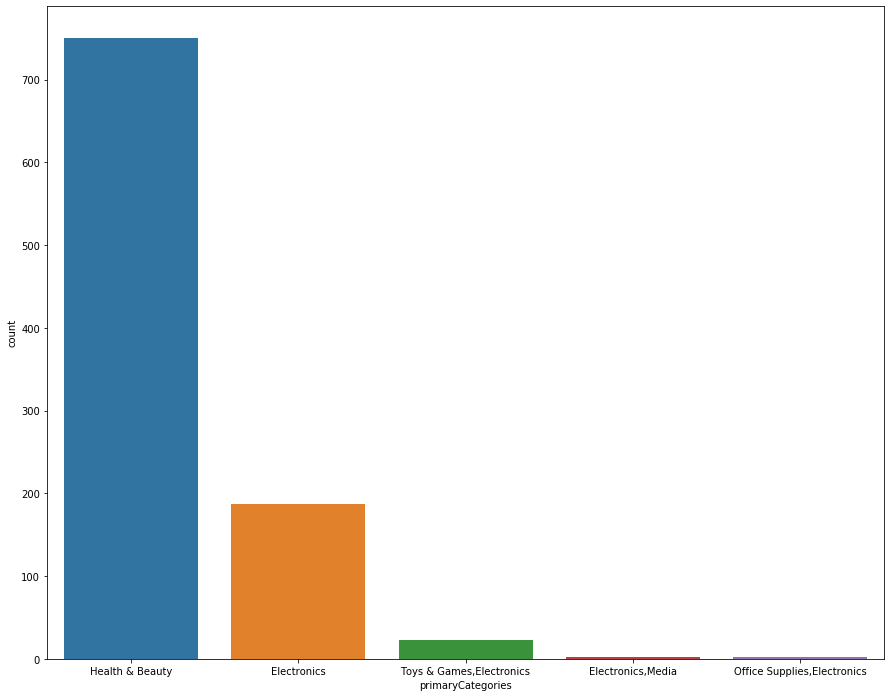

In [21]:
#Q.No-3
plt.figure(figsize=(15,12))
sns.countplot(data=df_amz_1,x=df_amz_1.primaryCategories)
#plt.savefig('path')
#Ans-Health & Beauty

In [22]:
gbo1=df_amz_1.groupby(by='primaryCategories').primaryCategories.count()

In [23]:
gbo1

primaryCategories
Electronics                    187
Electronics,Media                2
Health & Beauty                751
Office Supplies,Electronics      2
Toys & Games,Electronics        23
Name: primaryCategories, dtype: int64

In [25]:
#function to remove punctuation
def clean_data(review):
    
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    #check char exist with punctions
    nopunc_review=[char for char in review if char not in string.punctuation]
    
    #concatenate
    nopunc_review=''.join(nopunc_review)
    
    #Clean data
    clean_review = [word for word in nopunc_review.split() if word.lower() not in stopwords.words('english')]
    
    return clean_review

In [26]:
df_amz_1.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
16,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,I don't know if I would buy thus brand again s...,... know if I would buy thus brand again seems...,ByLaura,"https://www.barcodable.com/upc/841710106442,ht..."
24,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These do not last long at all very cheap batte...,... not last long at all very cheap batteries ...,ByDiane ault,"https://www.barcodable.com/upc/841710106442,ht..."
39,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are horrible. We depend on AA ...,1/4 Capacity Batteries,ByKeith,"https://www.barcodable.com/upc/841710106442,ht..."
43,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,First time I bought these they worked well and...,"1st purchase was good, this time they are junk!",ByAlaska Moutian Man,"https://www.barcodable.com/upc/841710106442,ht..."
45,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These batteries don't last even in a simple di...,2 weeks at best.,ByMark A. Hougham,"https://www.barcodable.com/upc/841710106442,ht..."


In [27]:
bow=df_amz_1['reviews_text'].apply(clean_data)

In [28]:
bow.head()

16    [dont, know, would, buy, thus, brand, seems, l...
24                [last, long, cheap, batteries, happy]
39    [batteries, horrible, depend, AA, batteries, m...
43    [First, time, bought, worked, well, lasted, al...
45    [batteries, dont, last, even, simple, digital,...
Name: reviews_text, dtype: object

In [29]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mukesh Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [30]:
lst_words=[]
count=0
for lst in bow:
    for i in range(0,len(lst)):
        if count<=50:
            lst_words.append(lst[i])

lst_words

['dont',
 'know',
 'would',
 'buy',
 'thus',
 'brand',
 'seems',
 'like',
 'dont',
 'last',
 'long',
 'Duracell',
 'last',
 'long',
 'cheap',
 'batteries',
 'happy',
 'batteries',
 'horrible',
 'depend',
 'AA',
 'batteries',
 'many',
 'wireless',
 'microphone',
 'found',
 'brandname',
 'batteries',
 'last',
 'month',
 'per',
 'usage',
 'switched',
 'Amazon',
 'basics',
 'try',
 'subscription',
 'preferred',
 'brand',
 'longer',
 'available',
 'found',
 'usage',
 'batteries',
 'last',
 'week',
 'Thats',
 '14',
 'capacity',
 'First',
 'time',
 'bought',
 'worked',
 'well',
 'lasted',
 'almost',
 'long',
 'name',
 'brands',
 'time',
 'around',
 'almost',
 'charge',
 '46',
 'hours',
 'run',
 'time',
 'Junk',
 'batteries',
 'batteries',
 'dont',
 'last',
 'even',
 'simple',
 'digital',
 'clock',
 '2',
 'weeks',
 'best',
 'Date',
 'back',
 '1992',
 'Yeah',
 '1992',
 'Inedible',
 'Battery',
 'storage',
 'life',
 'lasted',
 '8',
 'months',
 'stored',
 'indoors',
 'first',
 'recharging',
 'leak

In [31]:
#Q.No-4
nltk.pos_tag(bow.loc[16])
#Ans-VBZ

[('dont', 'NN'),
 ('know', 'NN'),
 ('would', 'MD'),
 ('buy', 'VB'),
 ('thus', 'RB'),
 ('brand', 'NN'),
 ('seems', 'VBZ'),
 ('like', 'IN'),
 ('dont', 'NN'),
 ('last', 'JJ'),
 ('long', 'RB'),
 ('Duracell', 'NNP')]

In [32]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
def clean_data1(review):
    
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """ 
    #check char exist with punctions
    nopunc_review=[char for char in review if char not in string.punctuation]
    
    #concatenate
    nopunc_review=''.join(nopunc_review)
    
    #Clean data
    text_review=''
    for word in nopunc_review.split():
        if word.lower() not in stopwords.words('english'):
            text_review= text_review+' '+ word
    return text_review

In [34]:
text_Review1=df_amz_1.reviews_text.apply(clean_data1)

In [35]:
text=''
for w in text_Review1:
    text=text+' '+w

In [36]:
text

'  dont know would buy thus brand seems like dont last long Duracell  last long cheap batteries happy  batteries horrible depend AA batteries many wireless microphone found brandname batteries last month per usage switched Amazon basics try subscription preferred brand longer available found usage batteries last week Thats 14 capacity  First time bought worked well lasted almost long name brands time around almost charge 46 hours run time Junk batteries  batteries dont last even simple digital clock 2 weeks best  Date back 1992 Yeah 1992 Inedible  Battery storage life lasted 8 months stored indoors  first recharging leaking wrapping coming waste money  dont last long  Lasted week electric toothbrush Energizer Duracell brand lasted month Tried 4 different Amazon batteries results dissatisfied  batteries came dead return got new ones Second order firstUpdate still yet receive refund second order several weeks  dead  37 days old Amazon fire stick quit working system fine seemed like remot

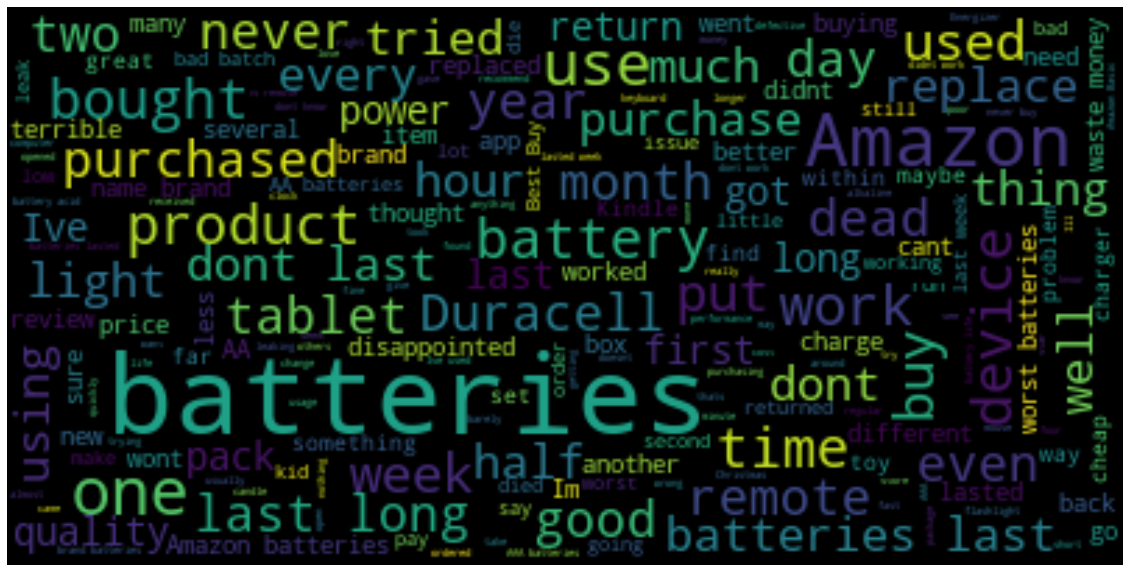

In [37]:
#Q.No-5
wordcloud = WordCloud(max_font_size=40).generate(text)

# Display the generated image:
plt.figure(figsize=(20,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#Ans-batteries

In [38]:
wordcloud.words_

{'batteries': 1.0,
 'Amazon': 0.31513260530421217,
 'one': 0.2745709828393136,
 'use': 0.22152886115444617,
 'time': 0.18408736349453977,
 'work': 0.18252730109204368,
 'bought': 0.1794071762870515,
 'battery': 0.1747269890795632,
 'product': 0.17004680187207488,
 'device': 0.1684867394695788,
 'used': 0.15756630265210608,
 'week': 0.1497659906396256,
 'put': 0.1482059282371295,
 'buy': 0.14664586583463338,
 'day': 0.1357254290171607,
 'dead': 0.1310452418096724,
 'month': 0.12792511700468018,
 'good': 0.12480499219968799,
 'tablet': 0.11856474258970359,
 'never': 0.11232449297971919,
 'even': 0.10764430577223089,
 'remote': 0.1060842433697348,
 'purchased': 0.10452418096723869,
 'year': 0.10452418096723869,
 'Duracell': 0.0998439937597504,
 'last long': 0.0967238689547582,
 'two': 0.093603744149766,
 'tried': 0.0842433697347894,
 'purchase': 0.0842433697347894,
 'batteries last': 0.08268330733229329,
 'half': 0.078003120124805,
 'hour': 0.078003120124805,
 'dont last': 0.0780031201248

In [39]:
#display chart
#image = wordcloud.to_image()
#image.show()

In [40]:
#Q.No-6
df_amz_5=df_amz.loc[df_amz.reviews_rating==5]
text_Review5=df_amz_5.reviews_text.apply(clean_data1)

In [41]:
text5=''
for w in text_Review5:
    text5=text5+' '+w

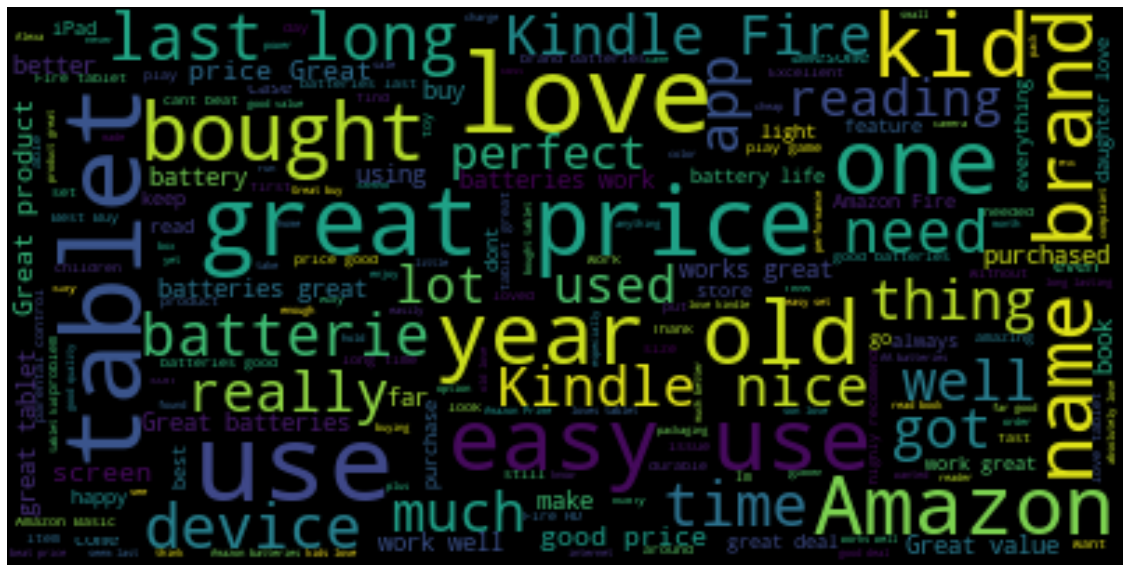

In [42]:
wordcloud2 = WordCloud(max_font_size=40).generate(text5)

# Display the generated image:
plt.figure(figsize=(20,18))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
#display chart
image = wordcloud2.to_image()
image.show()
#image.save('path')

In [46]:
wordcloud2.words_

{'use': 1.0,
 'love': 0.9739069111424542,
 'tablet': 0.9682651622002821,
 'great price': 0.731311706629055,
 'one': 0.7038081805359662,
 'easy use': 0.6734837799717912,
 'kid': 0.6255289139633287,
 'year old': 0.6170662905500706,
 'Amazon': 0.5655853314527504,
 'bought': 0.5211565585331452,
 'name brand': 0.5091678420310296,
 'last long': 0.4809590973201692,
 'time': 0.459802538787024,
 'device': 0.45627644569816644,
 'batterie': 0.42665726375176305,
 'need': 0.421015514809591,
 'really': 0.38645980253878703,
 'well': 0.3709449929478138,
 'much': 0.3695345557122708,
 'Kindle': 0.3695345557122708,
 'Kindle Fire': 0.3533145275035261,
 'thing': 0.34978843441466856,
 'got': 0.3469675599435825,
 'app': 0.34062059238363895,
 'nice': 0.33568406205923834,
 'reading': 0.3300423131170663,
 'used': 0.32933709449929477,
 'lot': 0.32863187588152326,
 'perfect': 0.31734837799717913,
 'price Great': 0.3159379407616361,
 'good price': 0.3152327221438646,
 'Great product': 0.3131170662905501,
 'screen'

In [45]:
#Q.No-7
df_amz_3=df_amz.loc[df_amz.reviews_rating==3]

In [47]:
text3=''
for review in df_amz_3.reviews_text:
    text3=text3+' '+ str(review)

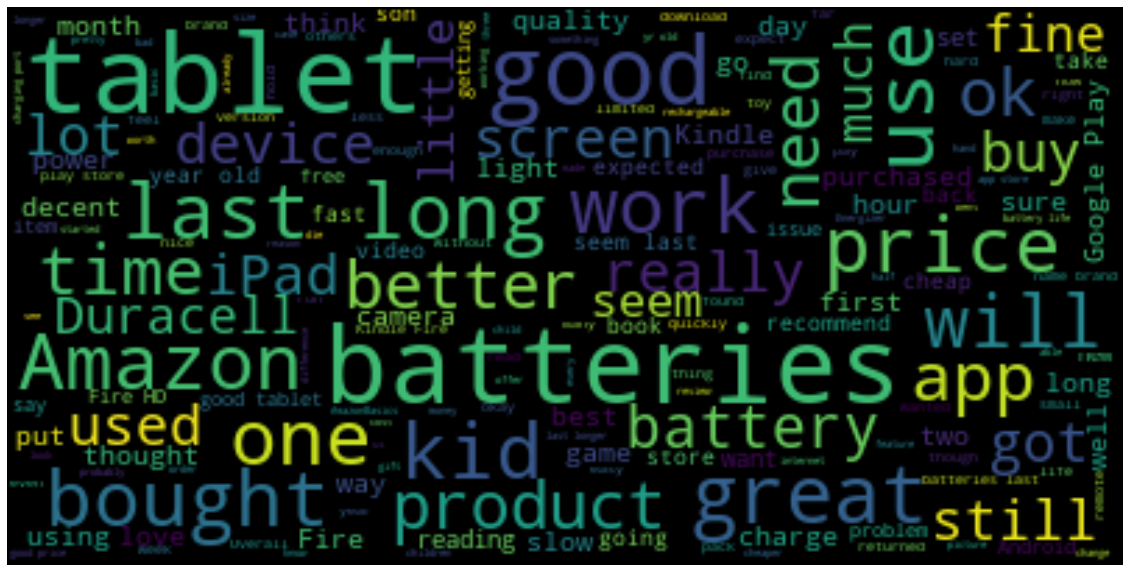

In [48]:
wordcloud3 = WordCloud(max_font_size=40).generate(text3)

# Display the generated image:
plt.figure(figsize=(20,18))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
 #The pil way (if you don't have matplotlib)
image = wordcloud3.to_image()
image.show()

In [50]:
lst_word=['batteries','Amazon','tablet','device']
for w in lst_word:
    print(wordcloud3.words_.get(w))
#Ans- device

0.916955017301038
0.4532871972318339
1.0
0.22145328719723184


In [51]:
#Q.No-8
cond1=df_amz.reviews_rating==1
cond2=df_amz.primaryCategories=='Electronics'
df_amz_8=df_amz.loc[cond1&cond2]
#Ans- great

In [52]:
text_Review8=df_amz_8.reviews_text.apply(clean_data1)

In [53]:
text8=''
for review in text_Review8:
    text8=text8+' '+ str(review)

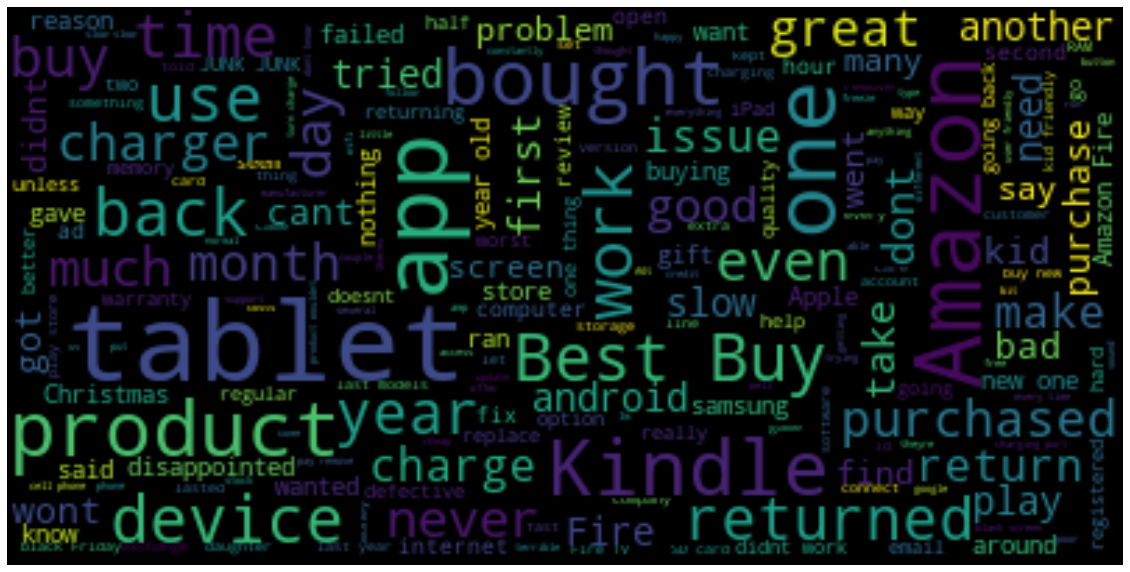

In [54]:
wordcloud8 = WordCloud(max_font_size=40).generate(text8)

# Display the generated image:
plt.figure(figsize=(20,18))
plt.imshow(wordcloud8, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
image = wordcloud8.to_image()
image.show()

In [57]:
lst_word2=['batteries','Amazon','love','great']
for w in lst_word:
    print(wordcloud3.words_.get(w))


0.916955017301038
0.4532871972318339
1.0
0.22145328719723184


In [58]:
#Q.No-9
#Ans-JJ
ond1=df_amz.reviews_rating==1
cond2=df_amz.primaryCategories=='Electronics'
df_amz_9=df_amz.loc[cond1&cond2]

In [59]:
df_amz_9['reviews_text']=df_amz_8.reviews_text.apply(clean_data)

C:\Users\Mukesh Sharma\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
lst_words=[]
count=0
for lst in df_amz_9.reviews_text:
    for i in range(0,len(lst)):
        if count<=50:
            lst_words.append(lst[i])

lst_words

['unable',
 'connect',
 'WIFI',
 'product',
 'tried',
 'follow',
 'instructions',
 'avail',
 'useless',
 'expensive',
 'item',
 'sitting',
 'table',
 'Since',
 'purchased',
 'returned',
 'couple',
 'times',
 'dead',
 'return',
 'first',
 'problem',
 'didnt',
 'paired',
 'review',
 'valid',
 'due',
 'device',
 'work',
 'would',
 'put',
 'upgraded',
 'ECHO',
 'instead',
 'tap',
 'excited',
 'get',
 'tap',
 'since',
 'larger',
 'speaker',
 'dot',
 'unlike',
 'echo',
 'battery',
 'charger',
 'make',
 'portable',
 'already',
 'echo',
 'works',
 'perfectly',
 'home',
 'listening',
 'online',
 'radio',
 'tap',
 'cut',
 'constantly',
 'returned',
 'exchanged',
 'gor',
 'dot',
 'hard',
 'use',
 'support',
 'Guam',
 'online',
 'instructions',
 'clear',
 'tin',
 'sounding',
 'bass',
 'sounds',
 'terrible',
 'bought',
 'bose',
 'sound',
 'link',
 'amazon',
 'dot',
 'hook',
 'speaker',
 'voice',
 'quality',
 'terrible',
 'compare',
 'similar',
 'size',
 'logitech',
 'UE',
 'BOOMthe',
 'price',
 'hi

In [61]:
lst_words.sort(reverse=False)

In [62]:
lst1=['much']

In [63]:
nltk.pos_tag(lst1)

[('much', 'JJ')]

In [64]:
nltk.pos_tag(lst_words)

[('1', 'CD'),
 ('1', 'CD'),
 ('1', 'CD'),
 ('1', 'CD'),
 ('1', 'CD'),
 ('1', 'CD'),
 ('1', 'CD'),
 ('1', 'CD'),
 ('1', 'CD'),
 ('1', 'CD'),
 ('10', 'CD'),
 ('10', 'CD'),
 ('100', 'CD'),
 ('100', 'CD'),
 ('1000', 'CD'),
 ('1000', 'CD'),
 ('100V240v', 'CD'),
 ('100s', 'CD'),
 ('101', 'CD'),
 ('101', 'CD'),
 ('1080', 'CD'),
 ('10s', 'CD'),
 ('11', 'CD'),
 ('11', 'CD'),
 ('11', 'CD'),
 ('11', 'CD'),
 ('110V', 'CD'),
 ('112816', 'CD'),
 ('15', 'CD'),
 ('15', 'CD'),
 ('15', 'CD'),
 ('15', 'CD'),
 ('15', 'CD'),
 ('15', 'CD'),
 ('15', 'CD'),
 ('16', 'CD'),
 ('16', 'CD'),
 ('16GB', 'CD'),
 ('16GB', 'CD'),
 ('16GB', 'CD'),
 ('18', 'CD'),
 ('18', 'CD'),
 ('1999', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('2', 'CD'),
 ('200', 'CD'),
 ('2015'

In [65]:
df_amz_9.reviews_text

12330    [unable, connect, WIFI, product, tried, follow...
12337    [Since, purchased, returned, couple, times, de...
12338    [review, valid, due, device, work, would, put,...
12339    [excited, get, tap, since, larger, speaker, do...
12694    [hard, use, support, Guam, online, instruction...
                               ...                        
28197    [Kindle, overloaded, apps, never, use, Despite...
28199    [bought, kindle, fire, 8, husband, use, Neithe...
28254    [Freeze, frequently, way, trouble, shoot, repair]
28265         [cheap, run, chrome, stuff, returned, store]
28285    [Worked, great, awhile, wouldnt, unlock, Id, e...
Name: reviews_text, Length: 187, dtype: object